Maximo Mejia
Z23421055
Assignment #3
https://colab.research.google.com/drive/1Pq8bYChZl0dIO5NReIC3kpwpHeA_vnp-?usp=sharing

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Neural Netword with single neuron
class NeuralNetwork():

  def __init__(self, num_params = 2):
    self.weight_matrix = 2 * np.random.random((num_params + 1, 1)) - 1
    self.l_rate = 1

  # hard_limiter as activation function
  def hard_limiter(self, x):
    outs = np.zeros(x.shape)
    outs[x>0] = 1
    return outs

  # forward propagation
  def forward_propagation(self, inputs):
    outs = np.dot(inputs, self.weight_matrix)
    return self.hard_limiter(outs)
  
  # training the neural network
  def train(self, train_inputs, train_outputs, num_train_iterations = 1000):
    
    for iteration in range(num_train_iterations):

      for i in range(train_inputs.shape[0]):

        pred_i = self.pred(train_inputs[i,:])

        if pred_i != train_outputs[i]:
          output = self.forward_propagation(train_inputs[i,:])

          error = train_outputs[i] - output
          adjustment = self.l_rate * error * train_inputs[i]

          self.weight_matrix[:,0] += adjustment
    
    print('Iteration #' + str(iteration))
    plot_fun_thr(train_inputs[:,1:3], train_outputs,
                 self.weight_matrix[:,0], classes)

  # predicting the classes of new data points
  def pred(self, inputs):
    preds = self.forward_propagation(inputs)
    return preds

 #Plot function   
def plot_fun_thr(features, labels, thre_parms, classes):

    plt.plot(features[labels[:] == classes[0], 0], 
             features[labels[:] == classes[0], 1], 'rs', 
             features[labels[:] == classes[1], 0], 
             features[labels[:] == classes[1], 1], 'g^')
    plt.axis([-5, 5, -5, 5])
    
    x1 = np.linspace(-5, 5, 50)
    x2 = - (thre_parms[1]*x1 + thre_parms[0])/thre_parms[2]

    plt.plot(x1, x2, '-r')
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class' + str(classes[0]), 'Class' + str(classes[1])])
    plt.grid()
    plt.show()

In [38]:
features = np.array([[1,0], [0,1], [-1, 0], [-1, 1], [0, -1]])
print(features)
print()

labels = np.array([1, 1, 0, 0, 0])
print(labels)
print()

classes = [0, 1]
bias = np.ones((features.shape[0], 1))
print(bias)
print(bias.shape)
print()

features = np.append(bias, features, axis = 1)
print('Features vector after adding the bias')
print(features)
print("Feature vector shape:", features.shape)

[[ 1  0]
 [ 0  1]
 [-1  0]
 [-1  1]
 [ 0 -1]]

[1 1 0 0 0]

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(5, 1)

Features vector after adding the bias
[[ 1.  1.  0.]
 [ 1.  0.  1.]
 [ 1. -1.  0.]
 [ 1. -1.  1.]
 [ 1.  0. -1.]]
Feature vector shape: (5, 3)


Random weights at the start of training
[[-0.80914111]
 [-0.31995874]
 [ 0.85044029]]

Iteration #99


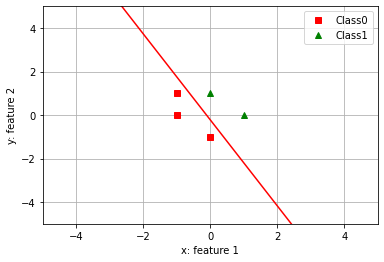

New weights after training
[[0.19085889]
 [1.68004126]
 [0.85044029]]


In [39]:
neural_network = NeuralNetwork(2)
print('Random weights at the start of training')
print(neural_network.weight_matrix)
print()

num_iterations = 100
neural_network.train(features, labels, num_iterations)

print('New weights after training')
print(neural_network.weight_matrix)

In [41]:
test = np.array([[2,2], [-2,-2], [0, 0], [-2, 0]])
bias = np.ones((test.shape[0], 1))
test = np.append(bias, test, axis = 1)
print(test)
print()

print("Testing network on new examples:")
print(neural_network.pred(test))


[[ 1.  2.  2.]
 [ 1. -2. -2.]
 [ 1.  0.  0.]
 [ 1. -2.  0.]]

Testing network on new examples:
[[1.]
 [0.]
 [1.]
 [0.]]
